**Интернет магазин "Стримчик"**

В данном проекте у нас дотупны данные по:
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Исходя и имеющихся данных мы:
- Подготовим данные к анализу
- Проведем исследовательский анализ данных
- Составим портрет пользователя каждого региона
- Проверим гипотезы.

Цель проекта:
Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**1. Откроем файл с данными и изучим общую информацию**

*Импортируем необходимые нам библиотеки.*

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt 
from scipy import stats as st
import numpy as np
import seaborn as sns

*Откроем файл с данными.*

In [2]:
data = pd.read_csv('/datasets/games.csv')

*Изучим информацию полученного файла.*

In [3]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Вывела первые 10 строк

*Приведем название столбцов к нижнему регистру.*


*Посмотрим информацию о таблице*

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


*Надо будет изменить тип данных в столбцах Year_of_Release и User_Score.*


*Проверим пропущенные значения в столбцах*

In [5]:
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

*У нас в 6 столбцах есть пропущенные значения*

**Теперь проверим столбецы по отдельности**

*Проверим ко-во дубликатов*

In [6]:
data.duplicated().sum()

0

*Дубликатов у нас нет*

*Постмотрим какие платформы у нас есть в талице*

In [7]:
data['Platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Platform, dtype: int64

*Посмотрим столбец с годом выпуска*

In [8]:
data[data['Year_of_Release'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


*У нас 269 пропущенных значений, некоторые года указаны в названии игр, перенести год из назвния. В остальных случаях решим по ходу исседования.*

*Посмотрим столбец с жанрами игры и нет ли повторяющих*   

In [9]:
data['Genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

*В столбце с жанрами все хорошо, но у нас есть 2 пропущенных значения.*

*Поверим столбец с оценкой критиков*

In [10]:
data[data['Critic_Score'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


*У нас получилсь,что половины инфомации отсутсвует.*

*Теперь проверим столбец с оценкой пользователь. Максимальная оценка максимум 10.*

In [11]:
data[data['User_Score'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [12]:
data['User_Score'].describe()

count     10014
unique       96
top         tbd
freq       2424
Name: User_Score, dtype: object

*В данном столбце у нас появилось аббревиатура 'tbd', мы ее преобразуем в NaN, после преобразуем в тип float.*

*Проверим последний столбец с рейтингом*

In [13]:
data[data['Rating'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


*В этом столбце так же есть пропущенные значения*

**Вывод**

Нам понадобится сделать:
- Перевести название столбцов к нижнему регистру;
- Изменить тип данных в столбце Year_of_Release;
- В столбце Year_of_Release пропущенные значения взять из названия игр;
- Обработать пропущенные значения в столбцах: Name, Platform, Year_of_Release, Critic_Score, User_Score, Rating;
- В столбце Useer_Score аббревиатуру 'tbd' мы ее изменим в NaN, после преобразуем в тип float.


**2. Подготовим файл**

*2.1. Переведем название столбцов к нижнему регистру*

In [14]:
data.columns = data.columns.str.lower()

In [15]:
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


*2.2. Преобразуем в тип данных int столбец year_of_release, что бы годы преобразовались в цлые числа.*

In [16]:
data['year_of_release'] = data['year_of_release'].astype('Int64')

In [17]:
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


*2.3.В столбце year_of_release пропущенные значения возьмем из названия игр.*

In [18]:
for i in data[data['year_of_release'].isnull() == True].index:  
    data['year_of_release'][i] = data.loc[data['name'] == data['name'][i], 'year_of_release'].max()

In [19]:
data.sample(15)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14158,Marines: Modern Urban Combat,Wii,2010,Shooter,0.03,0.00,0.00,0.00,NaN,tbd,T
3793,ModNation Racers,PSP,2010,Racing,0.11,0.26,0.02,0.14,73.0,7.7,E
5403,Disney Infinity 3.0,XOne,2015,Action,0.20,0.11,0.00,0.03,NaN,NaN,NaN
16302,Duel Love: Koisuru Otome wa Shouri no Megami,DS,2008,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
14641,Hissatsu Pachinko Collection 3,SNES,1995,Misc,0.00,0.00,0.03,0.00,NaN,NaN,NaN
14672,Triple Pack: Xbox Live Arcade Compilation,X360,2011,Misc,0.03,0.00,0.00,0.00,NaN,tbd,T
16682,Grisaia no Kajitsu: La Fruit de la Grisaia,PSP,2013,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
3574,Petz Dogz 2,PS2,2007,Simulation,0.28,0.21,0.00,0.07,NaN,tbd,E
16662,Hakuoki: Reimeiroku - Omouhase Kara,PSV,2015,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
11514,Captain Tsubasa: New Kick Off,DS,2010,Sports,0.00,0.02,0.06,0.00,NaN,NaN,NaN


*Посмотрим сколько у нас осталось пропущенных значний в столбце year_of_release.*

In [20]:
data[data['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
627,Rock Band,X360,<NA>,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,<NA>,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
805,Rock Band,Wii,<NA>,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T
1142,Rock Band,PS3,<NA>,Misc,0.99,0.41,0.00,0.22,92.0,8.4,T
...,...,...,...,...,...,...,...,...,...,...,...
16277,Homeworld Remastered Collection,PC,<NA>,Strategy,0.00,0.01,0.00,0.00,86.0,8.2,E10+
16288,Shorts,DS,<NA>,Platform,0.01,0.00,0.00,0.00,NaN,tbd,E10+
16348,Agarest Senki: Re-appearance,PS3,<NA>,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16458,Hakuouki: Shinsengumi Kitan,PS3,<NA>,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


*2.4. Удалим пропущенные значения.* 

In [21]:
data.dropna(subset=['name'],inplace=True)

In [22]:
data.isna().sum()

name                  0
platform              0
year_of_release     146
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

*В целом мы удалили только пропуски из названия игры и у нас вместе с ним удалился и жанра игры так как они взаимосвязаны были.* 

*Остался у нас столбец user_score с аббревиатурой tbd, который мы должны изменить в NaN, а потом преобразовать в тип float. Пропущенны значения заменим медианой*

In [23]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = float('nan')

In [24]:
data['user_score'] = data['user_score'].fillna(data['user_score'].median())

In [25]:
data['user_score'] = data['user_score'].astype(float)

*В столбце critic_score ток же заменим медианой.*

In [26]:
data['critic_score'] = data['critic_score'].fillna(data['user_score'].median())

In [27]:
data.isna().sum()

name                  0
platform              0
year_of_release     146
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score            0
rating             6764
dtype: int64

*У нас остолись толбци rating и year_of_release с пропущенными значениями, но по ходу если понадобится будем решать с ними*           

In [28]:
data['rating'].fillna(0, inplace=True)
data.sample(15)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
11659,Dragon Shadow Spell,PS2,2007,Role-Playing,0.00,0.00,0.08,0.00,7.5,7.5,0
4970,SD Gundam G Generation Spirits,PS2,2007,Strategy,0.00,0.00,0.38,0.00,7.5,7.5,0
4234,The Evil Within,X360,2014,Action,0.25,0.16,0.01,0.04,7.5,7.6,M
11626,Resident Evil Zero,XOne,2016,Action,0.05,0.02,0.00,0.01,7.5,7.5,0
15395,The King of Fighters NeoWave,XB,2006,Fighting,0.02,0.00,0.00,0.00,62.0,7.5,T
6764,Dora the Explorer: Journey to the Purple Planet,PS2,2005,Adventure,0.12,0.09,0.00,0.03,7.5,7.0,EC
1968,Defender,2600,1980,Misc,0.99,0.05,0.00,0.01,7.5,7.5,0
8968,Rayman Origins,3DS,2012,Platform,0.06,0.08,0.00,0.01,71.0,6.3,E10+
14175,Challenge Me: Word Puzzles,DS,2011,Puzzle,0.03,0.00,0.00,0.00,7.5,7.5,E10+
10517,NASCAR The Game: Inside Line,X360,2012,Racing,0.09,0.00,0.00,0.01,72.0,3.4,E


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16567 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


*Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец*

In [30]:
data['sales_all_regions'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [31]:
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_all_regions
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,7.5,7.5,0,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,7.5,7.5,0,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,7.5,7.5,0,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,7.5,7.5,0,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,7.5,7.5,0,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,7.5,7.5,0,0.01


*Мы вывели новый столбец sales_all_regions и посчитали в нем сумму продаж всех регионов.*

**3. Проведите исследовательский анализ данных**

*3.1. Проверим сколко игр выпускалось в разные годы*

In [32]:
data.year_of_release.value_counts()

2008    1440
2009    1431
2010    1271
2007    1202
2011    1153
2006    1020
2005     947
2002     845
2003     785
2004     765
2012     662
2015     606
2014     582
2013     547
2016     502
2001     484
1998     379
2000     350
1999     339
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1983      17
1989      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: Int64

*Мы видим что начиная с 2000-х годов начали активно выпускать новые игры.*

*Теперь посмотрим как это выглядит на графике*

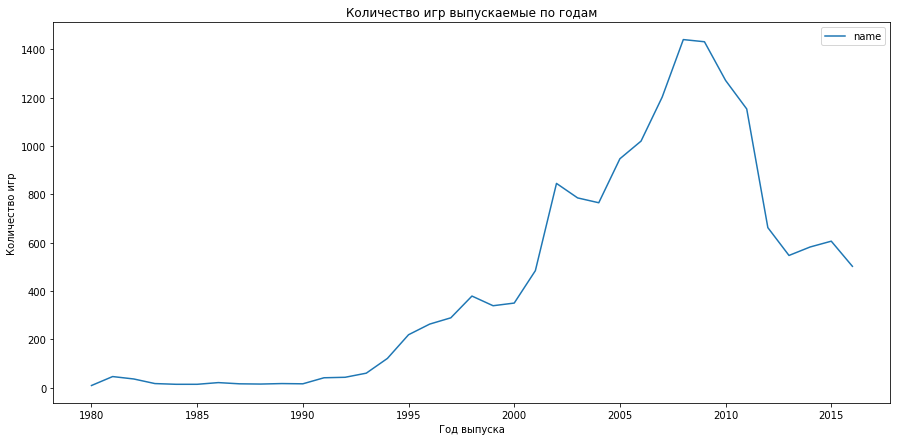

In [33]:
games_on_year = data.pivot_table(index='year_of_release', values='name', aggfunc='count')
plt.figure(figsize=(15,7))
sns.lineplot(data=games_on_year)
plt.title("Количество игр выпускаемые по годам")
plt.xlabel("Год выпуска")
plt.ylabel("Количество игр")
plt.show()

*По графику видно, что активный рост начался с 2000-х и 2010 начался спад.*

*3.2.Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?*

*Посмотрим на каких платормах больше всего продадаж*

In [34]:
data.groupby('platform').sum()['sales_all_regions']

platform
2600      96.98
3DO        0.10
3DS      259.00
DC        15.95
DS       806.12
GB       255.46
GBA      317.85
GC       198.93
GEN       28.35
GG         0.04
N64      218.68
NES      251.05
NG         1.44
PC       259.52
PCFX       0.03
PS       730.86
PS2     1255.77
PS3      939.65
PS4      314.14
PSP      294.05
PSV       54.07
SAT       33.59
SCD        1.86
SNES     200.04
TG16       0.16
WS         1.42
Wii      907.51
WiiU      82.19
X360     971.42
XB       257.74
XOne     159.32
Name: sales_all_regions, dtype: float64

*По данным мы можем видеть что максимальное коичесто на PS2, а минимальное на PCFX.*

*Посмотрим по графику, более информатино будет.*

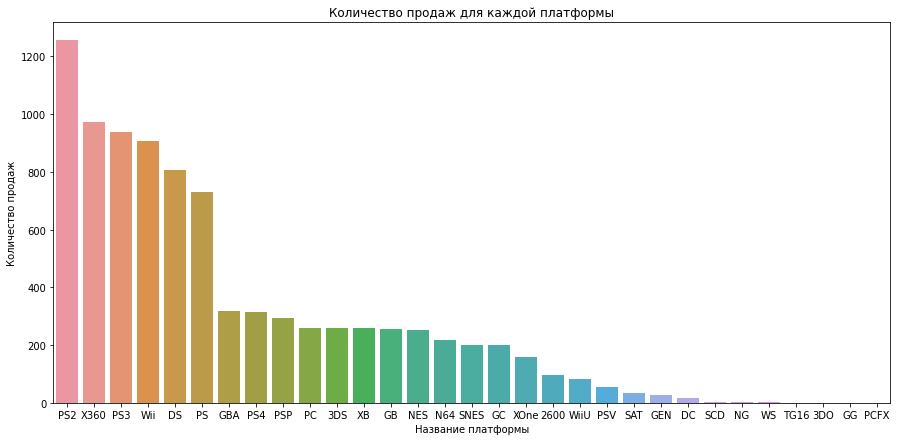

In [35]:
platform_on_sales = data.pivot_table(
    index='platform', values='sales_all_regions', aggfunc='sum').sort_values(by='sales_all_regions', ascending=False)

plt.figure(figsize=(15,7))
sns.barplot(x=platform_on_sales.index,y=platform_on_sales['sales_all_regions'])
plt.title("Количество продаж для каждой платформы")
plt.xlabel("Название платформы")
plt.ylabel("Количество продаж")
plt.show()

*На графике мы видим платформы с наибольшим сумаными продажами,это: PS2, X360, PS3, Wii, DS и PS.*

*Посмотрим на графике как долго были популярны платформы*

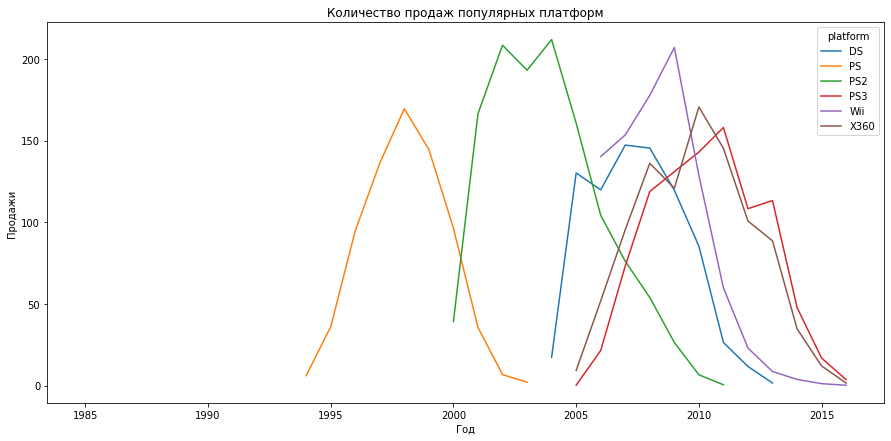

In [36]:
popularity_year = data.groupby('platform').sum()['sales_all_regions'].sort_values(ascending=False).index.values[:6]

popular_data = data[data.platform.isin(popularity_year)]

popular_data = popular_data.pivot_table(index='year_of_release', columns='platform', values='sales_all_regions', aggfunc='sum')

popular_data.plot(figsize=(15,7))

plt.title('Количество продаж популярных платформ')
plt.xlabel('Год')
plt.ylabel('Продажи')
plt.show()

*Мы можем заметить что из 6 популярных платформ. В среднем у них у всех популярность составляет 10 лет.*

*3.3. Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.*

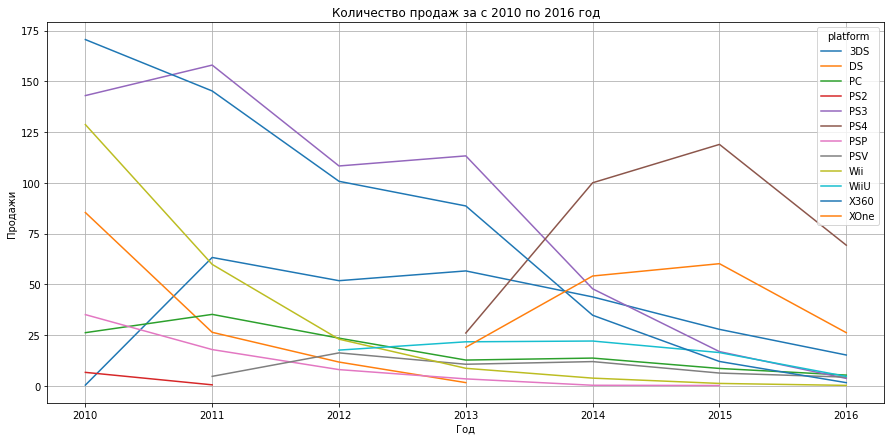

In [37]:
data = data.query("2010 <= year_of_release <= 2016")
data.pivot_table(index='year_of_release', columns = 'platform', values='sales_all_regions', aggfunc='sum').plot(grid=True, figsize=(15, 7))
plt.title('Количество продаж за с 2010 по 2016 год')
plt.xlabel('Год')
plt.ylabel('Продажи')
plt.show()

*Исходя из периода с 2010 по 2016, можем сказать что более актуальный период надо взять с 2015 года, так как большая часть платформ на нуле.*

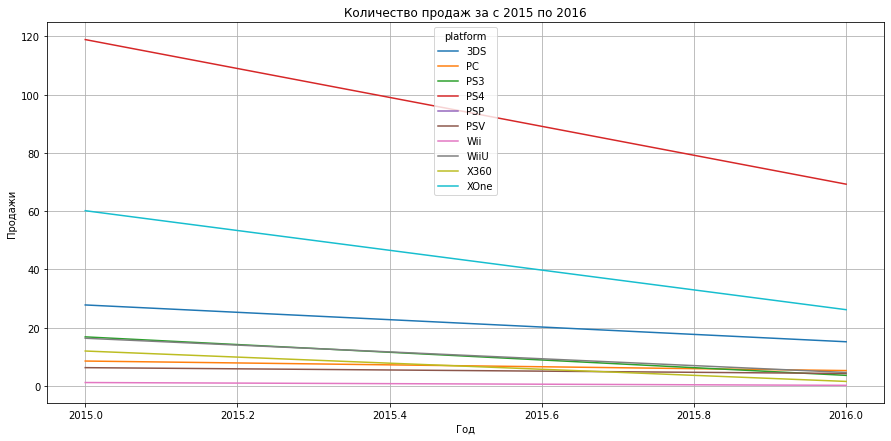

In [38]:
data = data.query("2015 <= year_of_release <= 2016")
data.pivot_table(index='year_of_release', columns = 'platform', values='sales_all_regions', aggfunc='sum').plot(grid=True, figsize=(15, 7))
plt.title('Количество продаж за с 2015 по 2016')
plt.xlabel('Год')
plt.ylabel('Продажи')
plt.show()

*3.4. Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.*

*По данному исследованиям мы видим что все платформы существующие с 2015 по 2016 стремятся к 0, некоторые на грани. Но PS4  самая продоваемая, после идет XONE и 3DS. Точный анализ мы не можем сделать, так как за 2016 год могут быть неполные данные.*

*3.5. Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам.*

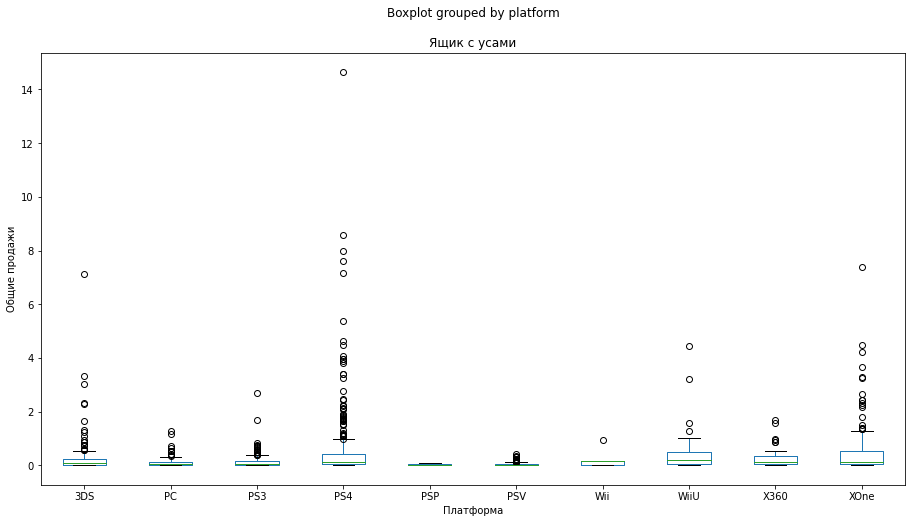

In [39]:
data.boxplot(column='sales_all_regions', by='platform', figsize=(15,8), grid=False).set(title='Ящик с усами',xlabel='Платформа', ylabel='Общие продажи')
plt.show()

*3.6. Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.*

*Построим диаграмму рассеивания между оценкой пользователями и продажам.*

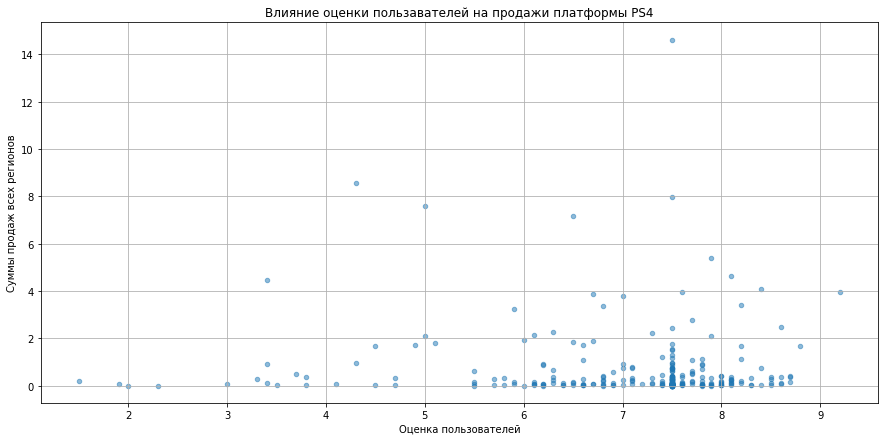

In [40]:
data[data['platform']=='PS4'].plot(x='user_score', y='sales_all_regions', kind='scatter', alpha=0.5, figsize=(15,7), grid=True)
plt.title('Влияние оценки пользавателей на продажи платформы PS4')
plt.xlabel('Оценка пользователей')
plt.ylabel('Суммы продаж всех регионов')
plt.show()

*По данной гистограмме видим что чем выше оценка тем больше продаж.* 

*Посчитаем корриляцию между оценкой пользователями и продажам.*

In [41]:
data_ps4 = data[data['platform']=='PS4']
data_ps4_cor = data_ps4['user_score'].corr(data_ps4['sales_all_regions'])
display('Корреляция между оценкой пользователями и продажам: {}'.format(data_ps4_cor))

'Корреляция между оценкой пользователями и продажам: -0.0675641400978089'

*Построим диограмму рассеивания между оценкой критиков и продажам.*

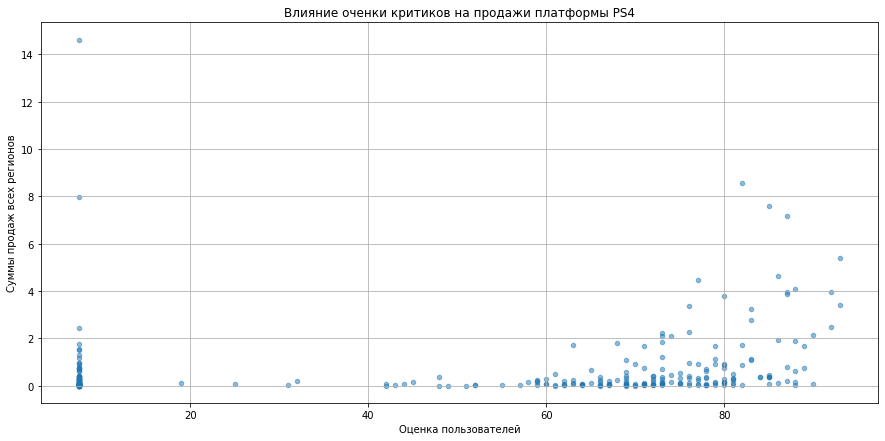

In [42]:
data[data['platform']=='PS4'].plot(x='critic_score', y='sales_all_regions', kind='scatter', alpha=0.5, figsize=(15,7), grid=True)
plt.title('Влияние оченки критиков на продажи платформы PS4')
plt.xlabel('Оценка пользователей')
plt.ylabel('Суммы продаж всех регионов')
plt.show()


*Так же и по данной гистограмме видим что чем выше оценка тем больше продаж.* 

*Посчитаем корриляцию между оценкой критиками и продажам.*

In [43]:
data_ps4 = data[data['platform']=='PS4']
data_ps4_cor = data_ps4['critic_score'].corr(data_ps4['sales_all_regions'])
display('Корреляция между оценкой критиков и продажам: {}'.format(data_ps4_cor))

'Корреляция между оценкой критиков и продажам: 0.18934650253284005'

*Сравнив  диаграммы можно сказать что оценка критиков влияет на продажи больше, чем оценка пользователей.*

*3.7. Соотнесите выводы с продажами игр на других платформах.*

In [44]:
data_popular_grouped = data.groupby('platform').sum()
data_popular_grouped

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,sales_all_regions
platform,,,,,,,,
3DS,266026,10.31,7.39,23.55,1.67,2842.5,990.1,42.92
PC,209614,3.72,9.10,0.00,0.95,6140.0,678.9,13.77
PS3,223703,5.66,7.30,4.97,2.49,888.0,764.3,20.42
PS4,606679,63.86,83.54,12.05,28.70,14170.0,2134.4,188.15
PSP,6045,0.00,0.00,0.12,0.00,22.5,22.5,0.12
PSV,393010,0.54,1.08,8.41,0.47,3028.5,1473.6,10.50
Wii,10076,0.49,0.73,0.00,0.10,37.5,37.5,1.32
WiiU,84644,8.86,6.49,4.12,1.48,2105.0,301.8,20.95
X360,96733,8.05,4.21,0.00,1.22,360.0,294.6,13.48


In [45]:
popular_platforms_list = data_popular_grouped.index.values
popular_platforms_list

array(['3DS', 'PC', 'PS3', 'PS4', 'PSP', 'PSV', 'Wii', 'WiiU', 'X360',
       'XOne'], dtype=object)

In [46]:
def cor (data):
    for i in popular_platforms_list:
        fx = data.query('platform == @i')
        print('Коэффициент корреляции оценок пользователей', i, ':', fx.user_score.corr(fx.sales_all_regions))
        print('Коэффициент корреляции оценок критиков', i, ':', fx.critic_score.corr(fx.sales_all_regions))

In [47]:
print(cor(data))

Коэффициент корреляции оценок пользователей 3DS : 0.08241824416874355
Коэффициент корреляции оценок критиков 3DS : 0.08764395007294366
Коэффициент корреляции оценок пользователей PC : 0.09820265906732177
Коэффициент корреляции оценок критиков PC : 0.2791863012864648
Коэффициент корреляции оценок пользователей PS3 : -0.32566346080776887
Коэффициент корреляции оценок критиков PS3 : -0.04582560984687534
Коэффициент корреляции оценок пользователей PS4 : -0.0675641400978089
Коэффициент корреляции оценок критиков PS4 : 0.18934650253284005
Коэффициент корреляции оценок пользователей PSP : nan
Коэффициент корреляции оценок критиков PSP : nan
Коэффициент корреляции оценок пользователей PSV : 0.1896556971873331
Коэффициент корреляции оценок критиков PSV : 0.35785527698821723
Коэффициент корреляции оценок пользователей Wii : nan
Коэффициент корреляции оценок критиков Wii : nan
Коэффициент корреляции оценок пользователей WiiU : 0.2984449206104014
Коэффициент корреляции оценок критиков WiiU : 0.374

*Просмотрев корреляцию оценок пользователей и критиков, можно сказать что оценки критиков  больше влияют на продажи, чем оценка пользователей.*

*3.8. Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?*

In [48]:
data_genre = data.pivot_table(
    index='genre', values='sales_all_regions', aggfunc='sum').sort_values(by='sales_all_regions', ascending=False)
data_genre = data_genre.reset_index().rename_axis(None, axis=1)
data_genre

,genre,sales_all_regions
0,Shooter,105.73
1,Action,102.13
2,Sports,64.33
3,Role-Playing,55.82
4,Misc,14.17
5,Fighting,12.37
6,Adventure,11.98
7,Racing,10.86
8,Platform,9.28
9,Simulation,7.55


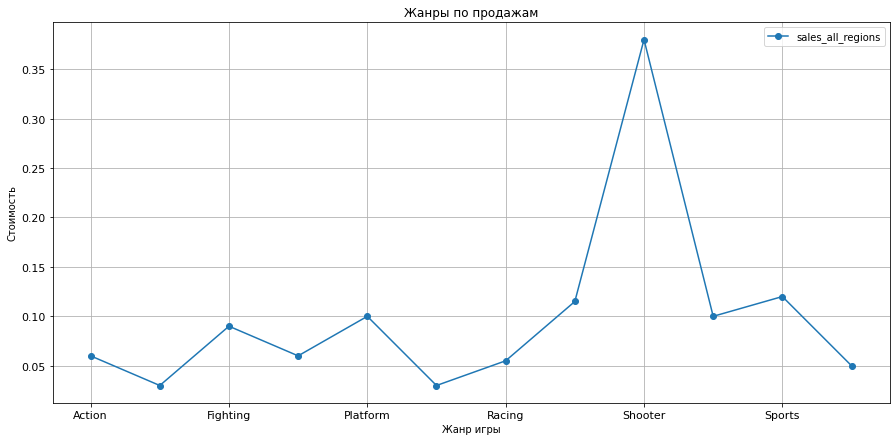

In [49]:
data.pivot_table(index='genre', values='sales_all_regions', aggfunc='median') \
.plot(grid=True, style='o-', figsize=(15, 7), fontsize=11)
plt.title('Жанры по продажам')
plt.xlabel('Жанр игры')
plt.ylabel('Стоимость')
plt.show()

*Можем выделить Самый высокий показатель у жанра это Shooter, а самый низкий у Puzzle.*

**4. Составьте портрет пользователя каждого региона.**

*Определите для пользователя каждого региона (NA, EU, JP):*

*- Определим самые популяные платформы в NA, EU, JP.*

In [50]:
popular_platform_na = data.groupby('platform').na_sales.mean().sort_values(ascending=False)[:5]
popular_platform_na

platform
XOne    0.301198
PS4     0.212159
WiiU    0.210952
X360    0.167708
Wii     0.098000
Name: na_sales, dtype: float64

In [51]:
popular_platform_eu = data.groupby('platform').eu_sales.mean().sort_values(ascending=False)[:5]
popular_platform_eu

platform
PS4     0.277542
XOne    0.168263
WiiU    0.154524
Wii     0.146000
X360    0.087708
Name: eu_sales, dtype: float64

In [52]:
popular_platform_jp = data.groupby('platform').jp_sales.mean().sort_values(ascending=False)[:5]
popular_platform_jp

platform
3DS     0.178409
WiiU    0.098095
PS3     0.044775
PSV     0.043128
PS4     0.040033
Name: jp_sales, dtype: float64

In [53]:
data_portrait_platform = pd.DataFrame(data=[popular_platform_na,popular_platform_eu, popular_platform_jp]).T
data_portrait_platform

,na_sales,eu_sales,jp_sales
platform,,,
XOne,0.301198,0.168263,NaN
PS4,0.212159,0.277542,0.040033
WiiU,0.210952,0.154524,0.098095
X360,0.167708,0.087708,NaN
Wii,0.098000,0.146000,NaN
3DS,NaN,NaN,0.178409
PS3,NaN,NaN,0.044775
PSV,NaN,NaN,0.043128


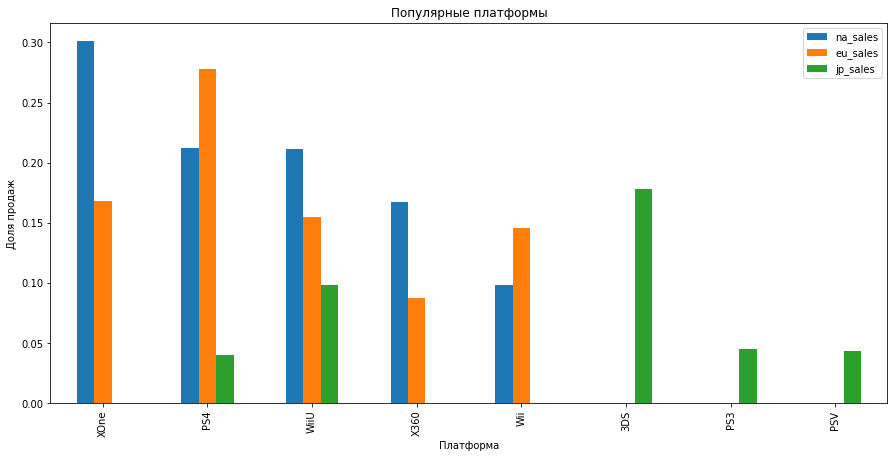

In [54]:
data_portrait_platform.plot(kind='bar',figsize=(15,7))
plt.title('Популярные платформы')
plt.xlabel('Платформа')
plt.ylabel('Доля продаж')
plt.show()

*- определим самые популярные жанры в NA, EU, JP.*

In [55]:
popular_genre_na = data.groupby('genre').na_sales.mean().sort_values(ascending=False)[:5]
popular_genre_na

genre
Shooter         0.594815
Sports          0.245888
Role-Playing    0.150152
Fighting        0.149730
Platform        0.135000
Name: na_sales, dtype: float64

*В Северной Америке самый популярный жанр это Shooter*

In [56]:
popular_genre_eu = data.groupby('genre').eu_sales.mean().sort_values(ascending=False)[:5]
popular_genre_eu

genre
Shooter         0.497284
Sports          0.260000
Racing          0.155238
Role-Playing    0.130379
Platform        0.114286
Name: eu_sales, dtype: float64

*В Европе так же популярен Shooter*

In [57]:
popular_genre_jp = data.groupby('genre').jp_sales.mean().sort_values(ascending=False)[:5]
popular_genre_jp

genre
Role-Playing    0.101591
Puzzle          0.074286
Simulation      0.058485
Action          0.053480
Platform        0.050714
Name: jp_sales, dtype: float64

*В Японии популярный жанр Role-Playing*

*Теперь полученные даные соберем в единую таблицу для сравнения*

In [58]:
data_portrait_genre = pd.DataFrame(data=[popular_genre_na, popular_genre_eu, popular_genre_jp]).T
data_portrait_genre

,na_sales,eu_sales,jp_sales
genre,,,
Shooter,0.594815,0.497284,NaN
Sports,0.245888,0.260000,NaN
Role-Playing,0.150152,0.130379,0.101591
Fighting,0.149730,NaN,NaN
Platform,0.135000,0.114286,0.050714
Racing,NaN,0.155238,NaN
Puzzle,NaN,NaN,0.074286
Simulation,NaN,NaN,0.058485
Action,NaN,NaN,0.053480


*По таблице мы можем понять, что пользователей 3-х стран интересуют игры с жанром Role-Playing (почти с одинаковыми показателями) и Platform.*

*Посмотрим как это будет выглядеть на графике.*

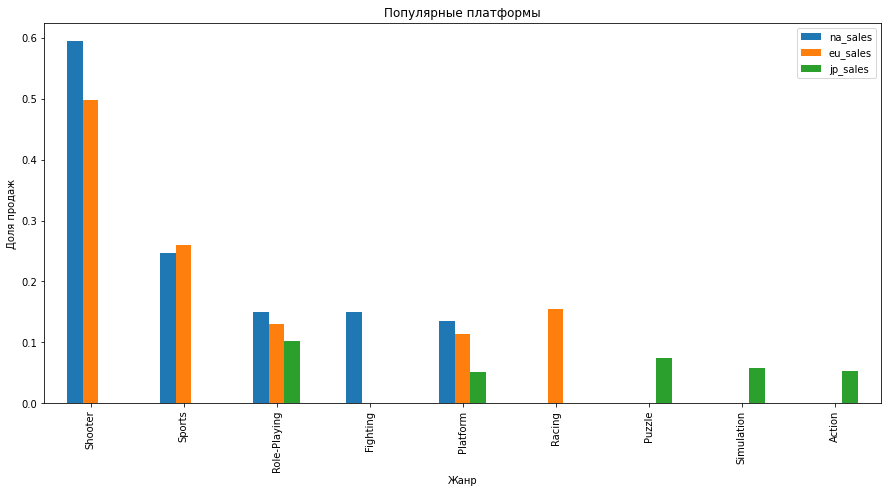

In [59]:
data_portrait_genre.plot(kind='bar',figsize=(15,7))
plt.title('Популярные платформы')
plt.xlabel('Жанр')
plt.ylabel('Доля продаж')
plt.show()

*По графику мы можем определить что самый продаваемый жанр игр в Северной Америке и Европе это Shooter.
В Японии доля продаж игр по жанрам очень низкая (почти не отличается друг от друга), но ТОП5 жанров самые высокие продажи это Role-Playing*

*По общей картине мы можем сказать что, лидеры продаж по ТОП5 жанрам игр, это Северая Америка и Европа, по сравнения с Японией.* 

*Теперь посмотрим влияет ли рейтинг ESRB на продажи в отдельном регионе.*

In [60]:
na_ratings = data.groupby('rating').sum().na_sales
na_ratings 

rating
0       37.44
E       26.59
E10+    17.87
M       47.03
T       22.86
Name: na_sales, dtype: float64

*В Северной Америке рейтинг ESRB выше всего влияет на продажи со знаком "М" (взрослые, но не младше 17 лет). 0 у нас на втором месте, но мы учитывать его не будем, так как у нас это пропущенные значения*

In [61]:
eu_ratings = data.groupby('rating').sum().eu_sales
eu_ratings 

rating
0       35.71
E       34.83
E10+    11.54
M       45.54
T       20.32
Name: eu_sales, dtype: float64

В Европе рейтинг ESRB выше всего влияет на продажи со знаком "М" (взрослые, но не младше 17 лет). 0 у нас на втором месте, но мы учитывать его не будем, так как у нас это пропущенные значения*

In [62]:
jp_ratings = data.groupby('rating').sum().jp_sales
jp_ratings 

rating
0       32.89
E        5.25
E10+     3.27
M        4.29
T        7.70
Name: jp_sales, dtype: float64

0 так же как не будем учитывать. В Японии рейтинг ESRB выше всего влияет на продажи со знаком "Т" (подростки, от 13 лет).

*Посмотрим как рейтинг ESRB влияет на продажи на графике*

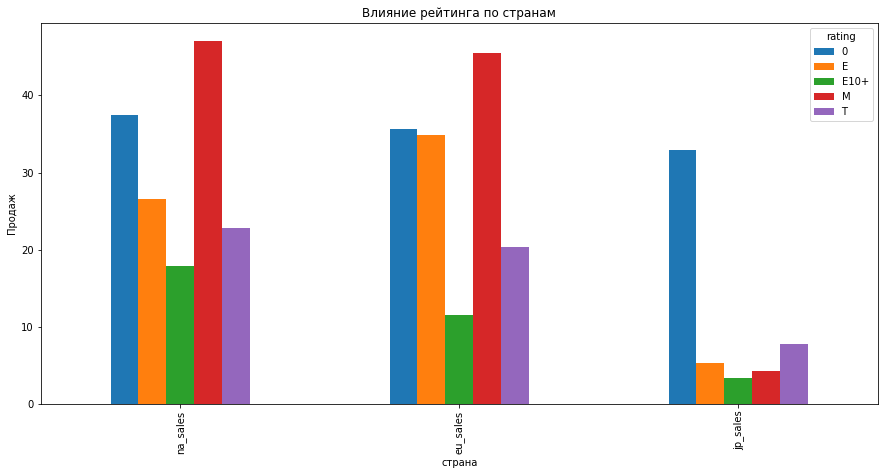

In [63]:
data_rating = pd.DataFrame([na_ratings, eu_ratings, jp_ratings])
data_rating.plot(kind='bar', figsize=(15,7))
plt.title('Влияние рейтинга по странам')
plt.xlabel('страна')
plt.ylabel('Продаж')
plt.show()

*По графику можем сказать что рейтинг ESRB в Северной Америке и в Европе влияет на продажи "М" (взрослые, но не младше 17 лет). Пропущенные занчения примерно на одном уровне во всех 3-х странах, если бы пропушенные значения были заполнены, то показатели могут значительно поменятся.*  

**5. Проверьте гипотезы**

*- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые*

Нулевая гипотеза: средний пользовательский рейтинг платформы Xbox One == средний пользовательский рейтинг платформы PC

Альтернативная гипотеза: средний пользовательский рейтинг платформы Xbox One != средний пользовательский рейтинг платформы PC

In [64]:
data_xbox = data.query('platform == "Xbox One"')['user_score']
data_pc = data.query('platform == "PC"')['user_score']
 
alpha = .05 

results = st.ttest_ind(
    data_pc,
    data_pc,
    equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.0
Не получилось отвергнуть нулевую гипотезу


*- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.*

Нулевая гипотеза: средний пользовательский рейтинг жанра Action == средний пользовательский рейтинг жанра Sports

Альтернативная гипотеза: средний пользовательский рейтинг жанра Action != средний пользовательский рейтинг жанра Sports

In [65]:
data_action = data.query('genre == "Action"')['user_score']
data_sports = data.query('genre == "Sports"')['user_score']

alpha = .05 

results = st.ttest_ind(
    data_action,
    data_sports,
    equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.3015128616973647e-11
Отвергаем нулевую гипотезу


В первой гипотезе:
"Средние пользовательские рейтинги платформ Xbox one и PC одинаковые". Нулевую гипотезу не удалось опровергнуть.
p-значение: 1.0


Во второй гипотезе:
"Средние пользовательские рейтинги жанров Action и Sports разные". Отвергаем нулевую гипотезу.
p-значение: 2.3015128616973563e-11



Для проверки гипотез мы вабрали критерий t-тест, потому что Т-тест позволит нам узнать средние значения двух выборок путем сравнения, а также вероятность того, что эти результаты возникли случайно.

**6. Общий вывод.**

*И так, у нас файл с данными котором мы изучили и подготовили к дальнейшему анализу:
- привели название столбцов к нижнему регистру
- нашли пропущенные значения в столбцах: Critic_Score, User_Score, Rating, Genre, Name, Year_of_Release.
- преобразовали в тип данных int столбец year_of_release, что бы годы преобразовались в цлые числа. И столец user_score преобразовали на тип float/
- в столбце year_of_release пропущенные значения возяли из названия игр.
- столбец user_score с аббревиатурой tbd, который мы изменили в NaN, а потом преобразовали в тип float. Пропущенны значения заменим медианой И столбце critic_score ток же заменим медианой.
- посчитали суммарные продажи во всех регионах и записали их в отдельный столбец

После анализа мы провели исследовательский анализ данных, выявили:
- активный рост выпука новых игр начался с 2000-х и с 2010 начался спад.
- платформы с наибольшим сумаными продажами,это: PS2, X360, PS3, Wii, DS и PS
- выявили что средний срок жизни платфоры примерно 10 лет;
- выяснили что все платформы существующие с 2015 по 2016 стремятся к 0, некоторые на грани. Но PS4 самая продоваемая, после идет XONE и 3DS
- выяснили что на продажи по одной из популярных платформ PS4 больше влияют оценки критиков чем пользователей. И такое же влияние на продажи и по остольным платформам;
- выделили самый высокий показатель у жанра Shooter, а самый низкий у Puzzle.


**В итоге для прогноза будущего мы выяснили.**

Для стран Европы и Северной Америки самые подходящие платформы PS4 и XOne, с жанрами игор Shooter и Sports и с рейтингом "М" (взролым от 17 лет).

Для Японии самая продаваемая платформа 3DS с жанром Role-Playing и рейтингом "Т" (подростки, от 13 лет), но если вспомнить что продолжительность жизни платформ ~10 лет, а 3DS начали выпускать в 2010 году, то можно предположить что продажи будут падать. Поэтому для Японии  в будующем лучшеакцентировать на WiiU (начало жизни платформы в 2012г. Эта же платформа на 3 месте по продажам в Европе и Северной Америке) и PS4 (она в Японии на 3-ем месте по продаам.).
  